In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3

In [2]:
conn = sqlite3.connect("election.db")

In [3]:
ad = pd.read_sql_query("select * from final_results",conn)

In [4]:
ad.head()

,State/Ut Name,Parliamentryconstituencies,ParliamentryName,Total Electors In PC,Assemblyconstituencies,AssemblyName,Total Electors In AC,Total Valid Votes In State,Nota Votes Evm In AC,Candidate Name,Party,Votes Secured Evm,Total_Votes,Turnout generalpercent,Votesharepercentage,Votes_pc_party,NOTA_percent,Winning Party,Margin
0,Rajasthan,13,AJMER,1999399,98,KISHANGARH,286257,32885413,1816,BHAGIRATH CHOUDHARY,BJP,107716,1180237,59.029588,9.126642,741151,0.153867,BJP,9245
1,Rajasthan,13,AJMER,1999399,105,KEKRI,264896,32885413,1742,BHAGIRATH CHOUDHARY,BJP,98471,1180237,59.029588,8.343324,741151,0.147597,BJP,9245
2,Rajasthan,13,AJMER,1999399,104,MASUDA,275740,32885413,1436,BHAGIRATH CHOUDHARY,BJP,97421,1180237,59.029588,8.254359,741151,0.121670,BJP,9245
3,Rajasthan,13,AJMER,1999399,99,PUSHKAR,254914,32885413,1496,BHAGIRATH CHOUDHARY,BJP,95780,1180237,59.029588,8.115319,741151,0.126754,BJP,9245
4,Rajasthan,13,AJMER,1999399,102,NASIRABAD,235530,32885413,1225,BHAGIRATH CHOUDHARY,BJP,89146,1180237,59.029588,7.553229,741151,0.103793,BJP,9245


**Exploratory Data Analysis**

*  Previously, we examined the various tables in the database to identify key variables,understand their relationships,and determine which ones should be included in the final analysis.

*  In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,identify anomalies, and ensure data quality before proceeding with further analysis.</br>

In [5]:
ad.describe().T

,count,mean,std,min,25%,50%,75%,max
Parliamentryconstituencies,61725.0,1.500212e+01,1.412497e+01,1.000000,4.000000e+00,1.100000e+01,2.200000e+01,8.000000e+01
Total Electors In PC,61725.0,1.809081e+06,3.833289e+05,57953.000000,1.623852e+06,1.810090e+06,2.005278e+06,3.780453e+06
Assemblyconstituencies,61725.0,9.697223e+01,7.802134e+01,1.000000,3.500000e+01,7.600000e+01,1.420000e+02,4.030000e+02
Total Electors In AC,61725.0,2.493684e+05,1.001638e+05,0.000000,2.055210e+05,2.489410e+05,3.007160e+05,1.054464e+06
Total Valid Votes In State,61725.0,3.481427e+07,2.244040e+07,49067.000000,1.704652e+07,3.332726e+07,4.320698e+07,8.727479e+07
Nota Votes Evm In AC,61725.0,1.414827e+03,1.675501e+03,0.000000,5.520000e+02,1.032000e+03,1.824000e+03,5.313300e+04
Votes Secured Evm,61725.0,1.029230e+04,2.650554e+04,0.000000,1.180000e+02,3.170000e+02,1.157000e+03,3.110360e+05
Total_Votes,61725.0,1.187967e+06,2.577727e+05,48630.000000,1.052224e+06,1.187943e+06,1.354314e+06,2.432395e+06
Turnout generalpercent,61725.0,6.647205e+01,1.025404e+01,38.112526,5.868361e+01,6.620002e+01,7.485915e+01,1.181036e+02
Votesharepercentage,61725.0,8.734669e-01,2.258752e+00,0.000000,1.009776e-02,2.690948e-02,9.894002e-02,5.886913e+01


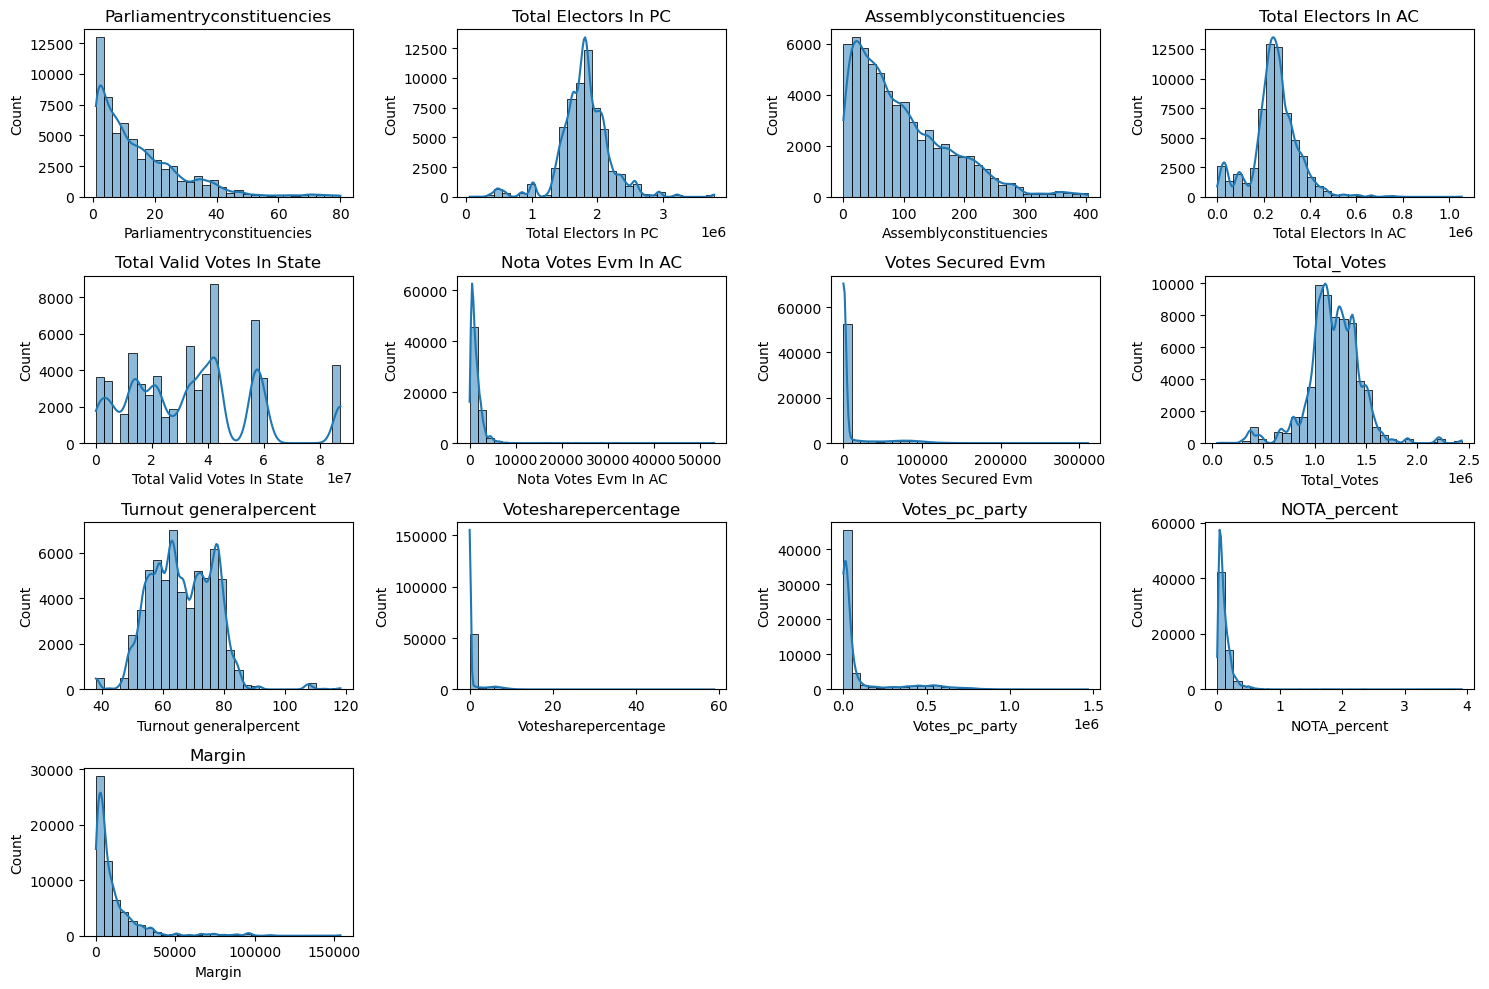

In [13]:
#Distribution Plots for Numerical Columns
numerical_cols = ad.select_dtypes(include = np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(ad[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout() 
plt.savefig("aman5.png", dpi = 1000)
plt.show()

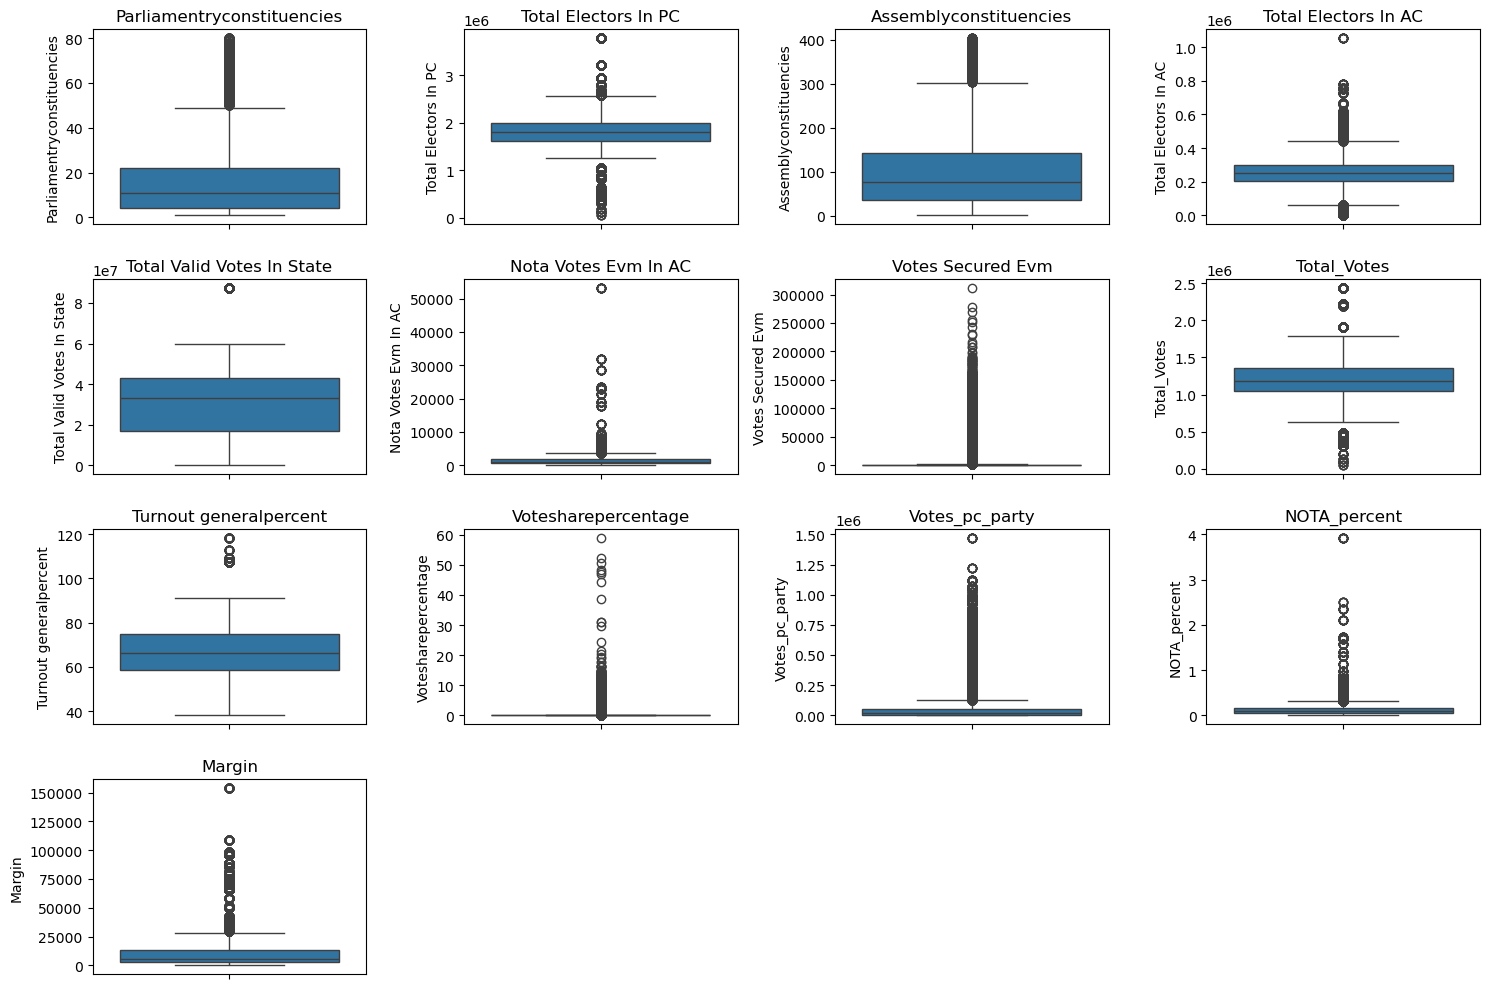

In [7]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y = ad[col])
    plt.title(col)
plt.tight_layout()    
plt.show()

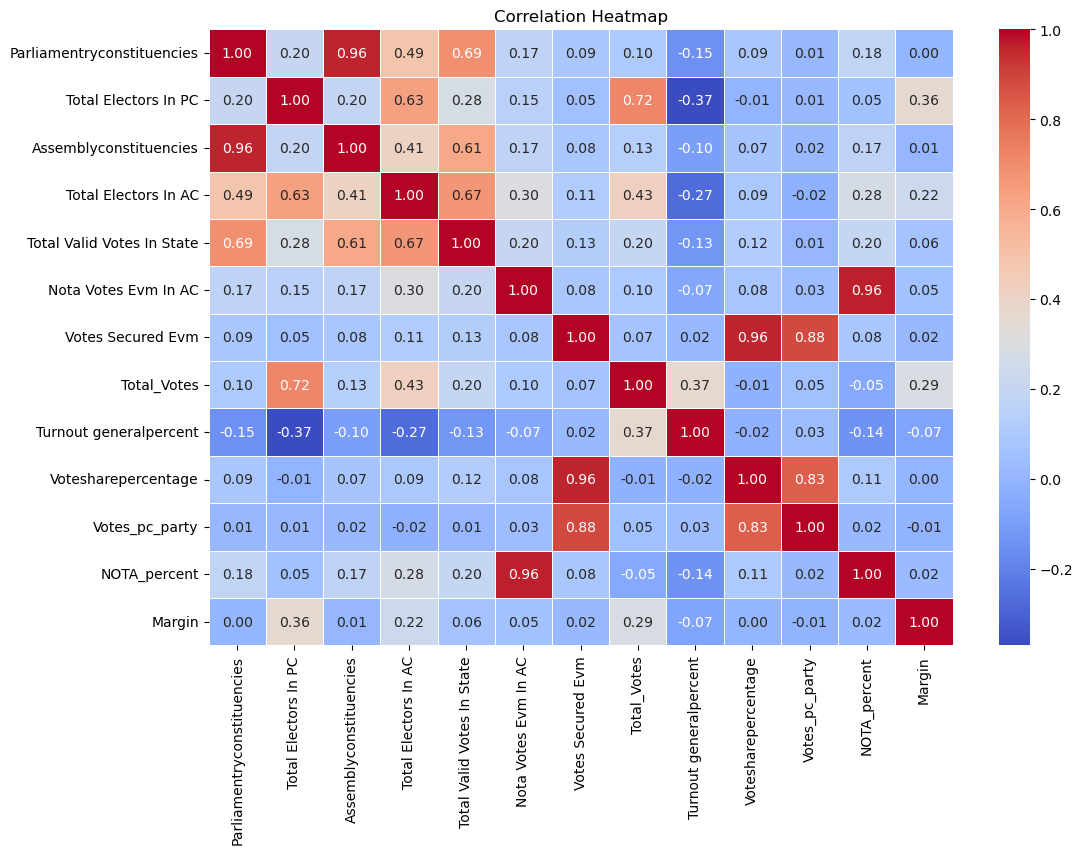

In [8]:
#correlation Heatmap
plt.figure(figsize = (12,8))
correlation_matrix = ad[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm",linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.savefig("aman3.png", dpi= 1000)
plt.show()

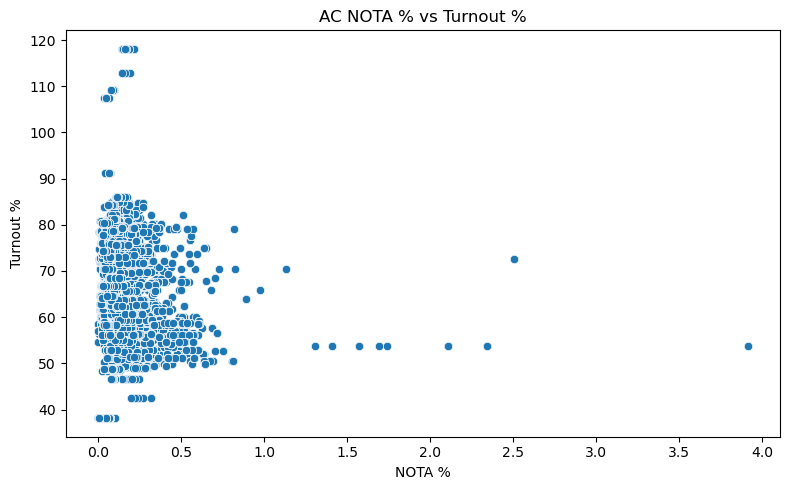

In [9]:
#ScatterPlot
plt.figure(figsize=(8,5))
sns.scatterplot(x="NOTA_percent", y="Turnout generalpercent", data=ad)
plt.title("AC NOTA % vs Turnout %")
plt.xlabel("NOTA %")
plt.ylabel("Turnout %")
plt.tight_layout()
plt.savefig("AC_NOTA_vs_Turnout.png", dpi=300)
plt.show()

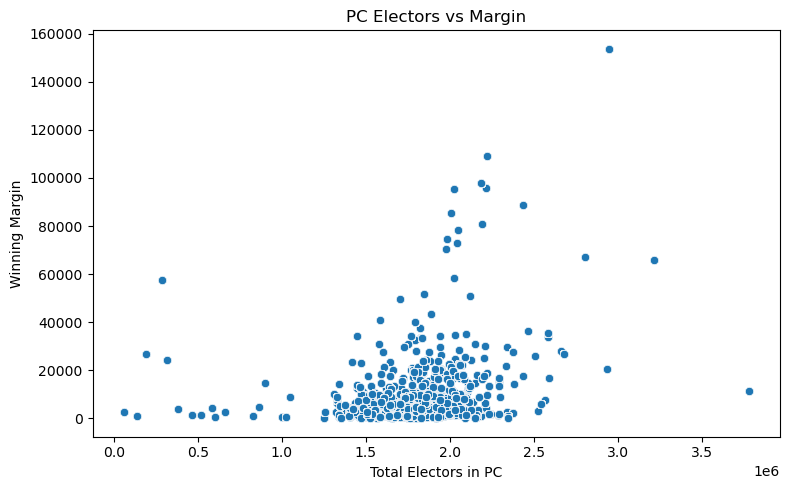

In [10]:
#ScatterPlot
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total Electors In PC", y="Margin", data=ad)
plt.title("PC Electors vs Margin")
plt.xlabel("Total Electors in PC")
plt.ylabel("Winning Margin")
plt.tight_layout()
plt.savefig("PC_Electors_vs_Margin.png", dpi=300)
plt.show()

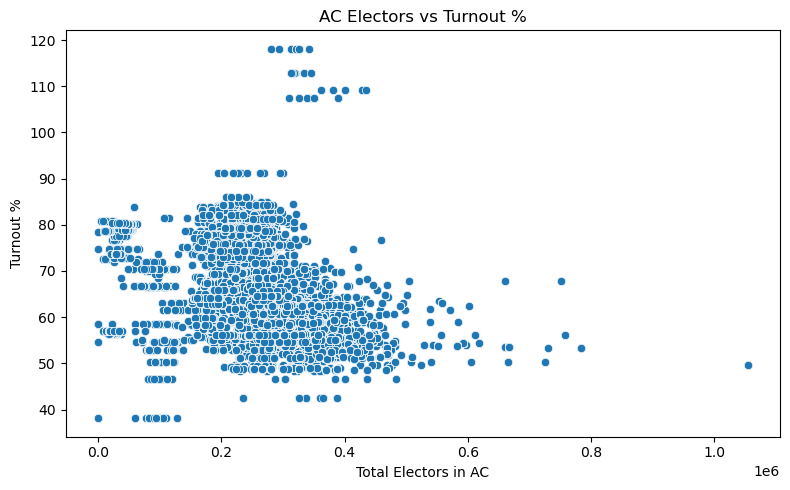

In [11]:
#ScatterPlot
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total Electors In AC", y="Turnout generalpercent", data=ad)
plt.title("AC Electors vs Turnout %")
plt.xlabel("Total Electors in AC")
plt.ylabel("Turnout %")
plt.tight_layout()
plt.savefig("AC_Electors_vs_Turnout.png", dpi=300)
plt.show()

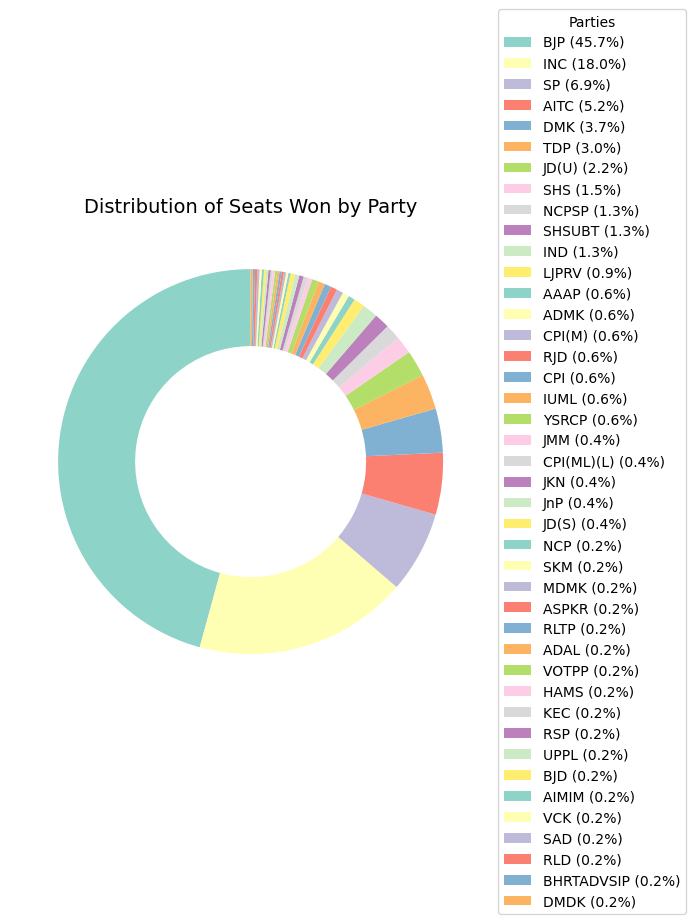

In [12]:
#Pie Chart
party_winners = ad.drop_duplicates("ParliamentryName")["Winning Party"].value_counts()
vote_percent = party_winners / party_winners.sum() * 100

# Donut Chart
plt.figure(figsize=(8,8))
colors = plt.cm.Set3.colors  

# Plot pie chart without percentages on wedges
wedges, texts = plt.pie(
    party_winners.values,
    labels=None,                 
    autopct=None,                
    startangle=90,
    colors=colors,
    wedgeprops={'width':0.4}
)
legend_labels = [f"{party} ({percent:.1f}%)" for party, percent in zip(party_winners.index, vote_percent)]
plt.legend(
    wedges, 
    legend_labels,
    title="Parties",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Distribution of Seats Won by Party", fontsize=14)
plt.tight_layout()
plt.savefig("Winning_Party_DonutChart.png", dpi=300)
plt.show()


## Votes Share Percentage Per Party

C:\Users\amanp\AppData\Local\Temp\ipykernel_46288\3361214486.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Party", y="Vote Share (%)", data=top_parties, palette="Set2")


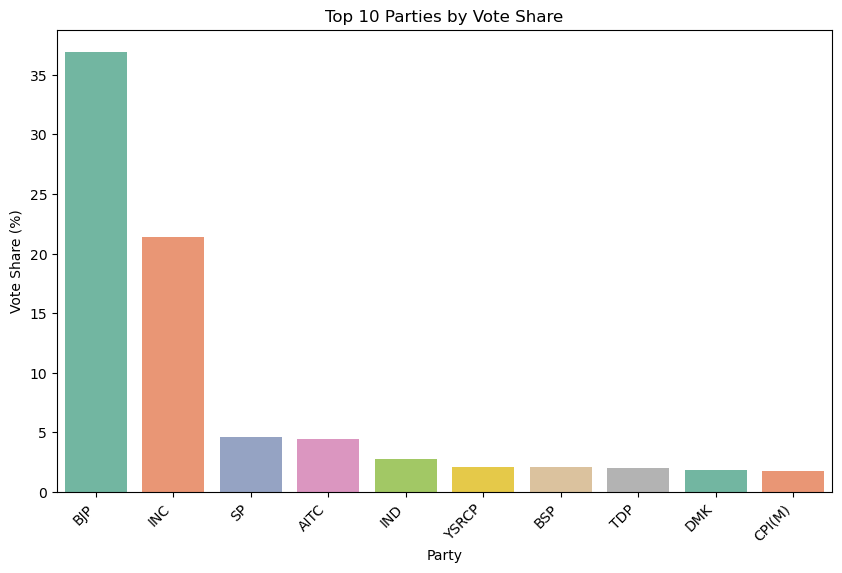

In [61]:

party_votes = ad.groupby("Party")["Votes Secured Evm"].sum()

total_votes = ad["Votes Secured Evm"].sum()

party_vote_share = (party_votes / total_votes) * 100

party_summary = pd.DataFrame({
    "Party": party_vote_share.index,
    "Vote Share (%)": party_vote_share.values
}).sort_values("Vote Share (%)", ascending=False)

top_parties = party_summary.head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="Party", y="Vote Share (%)", data=top_parties, palette="Set2")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Party")
plt.ylabel("Vote Share (%)")
plt.title("Top 10 Parties by Vote Share")
plt.show()
